In [14]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import color

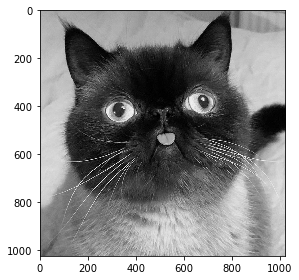

In [15]:
image = color.rgb2gray(io.imread('Images\\cat1000.jpg'))
io.imshow(image)

In [16]:
def multiply_by_matrix(img, matr):
    D = np.indices((img.shape[0], img.shape[1])).reshape(2, -1)
    D = np.vstack((D, np.ones(D.shape[1]))).astype(int)
    new = np.dot(np.linalg.inv(matr), D)
    x, y = D[0], D[1]
    x_new, y_new = new[0], new[1]
    new_image = np.empty_like(img)
    x_new, y_new = np.round(x_new).astype(int), np.round(y_new).astype(int)
    rule = np.where((x_new < img.shape[0]) & (y_new < img.shape[1]) & (x_new >= 0) & (y_new >= 0))
    x, y, x_new, y_new = x[rule], y[rule], x_new[rule], y_new[rule]

    new_image[x, y] = image[x_new, y_new]
    return new_image

In [19]:
def get_shift_matrix(a, b):
    return np.array([
        [1,0,a],
        [0,1,b],
        [0,0,1]
    ])

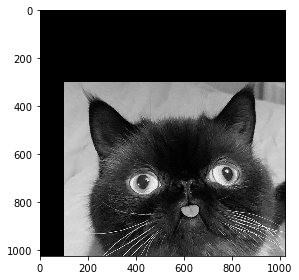

In [33]:
shift_matrix = get_shift_matrix(300,100)
shifted_image = multiply_by_matrix(image, shift_matrix)
io.imshow(shifted_image)

In [25]:
def get_scale_matrix(a, b):
    return np.array([
        [a,0,0],
        [0,b,0],
        [0,0,1]
    ])

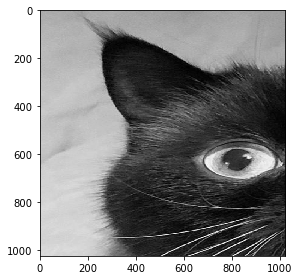

In [34]:
scale_matrix = get_scale_matrix(1.5,2.5)
scale_image = multiply_by_matrix(image, scale_matrix)
io.imshow(scale_image)

In [28]:
def get_rotate_matrix(angle):
    return np.array([
        [np.cos(angle),np.sin(angle),0],
        [-np.sin(angle),np.cos(angle),0],
        [0,0,1]
    ])

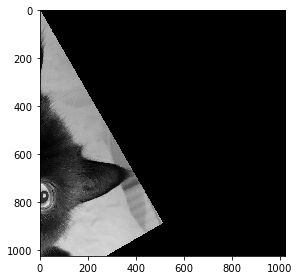

In [35]:
rotate_matrix = get_rotate_matrix(np.pi / 3)
rotated_image = multiply_by_matrix(image, rotate_matrix)
io.imshow(rotated_image)

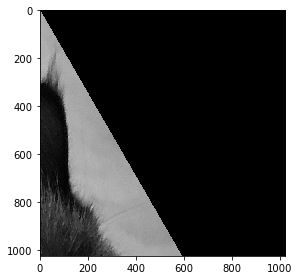

In [39]:
double_matr = np.dot(rotate_matrix, scale_matrix)
double_matr_image = multiply_by_matrix(image, double_matr)
io.imshow(double_matr_image)

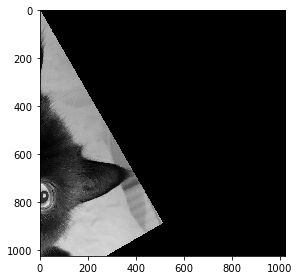

In [42]:
queue_double_image = multiply_by_matrix(multiply_by_matrix(image, scale_matrix), rotate_matrix)
io.imshow(queue_double_image)